# Zomato Restaurants in India

# Project Type: 
**EDA on Continuous Variables and Text Preprocessing & Unsupervised ML (Different Clustering models)**

# GitHub Link:

# Project Summary:

- **Zomato is an Indian Restaurant aggregator and used for food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008.**
- **Zomato provides information, menus and user-reviews of restaurants and also food delivery options from partner restaurants in select cities.**
- **India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity.**
- **Restaurant business in India is always evolving.**
- **More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered.**
- **The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city.**

**Restaurant Data:**
- **Name:** Name of the Restaurants
- **Links:** URL Links of Restaurants
- **Cost:** Per person estimated cost of dining
- **Collection:** Tagging of Restaurants w.r.t Zomato Categories.
- **Cuisines:** Cuisines served by Restaurants.

**Review Data:**
- **Reviewer:** Name of the reviewer
- **Review:** Review text
- **Rating:** Rating provided
- **MetaData:** Reviewer metadata-No.of reviews and followers
- **Time:** Data and Time of Review
- **Picture:** No.of pictures posted with review.

# Business Problem:

- **Analysing the Zomato restaurant data for each city in India**
- **Focuses on Customers and Company, To analyze the sentiments of the reviews given by customer in the data and make some useful conclusion in the form of Visualizations.**
- **Cluster the zomato restaurants into different segments.**
- **Conclusion is to find best restaurants in India to find people near by their places.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from scipy import stats

In [2]:
df=pd.read_csv("Zomato Restaurant names and Metadata.csv")
df

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [3]:
df1=df.copy(deep=True)
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


# Exploratory Data Analysis on Continuous & Discrete Data:

In [5]:
df1[df1["Timings"].isna()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [6]:
df1["Timings"].fillna("24 Hours Working",inplace=True)

In [7]:
#More than 10% of Data is missing, Droppind the column 
df1.drop("Collections",axis=1,inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    object
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [9]:
df1["Name"].value_counts()

Beyond Flavours                           1
Diners Pavilion                           1
Squeeze @ The Lime                        1
The Old Madras Baking Company             1
Royal Spicy Restaurant                    1
                                         ..
Marsala Food Company                      1
Pista House                               1
Pot Pourri                                1
Hunger Maggi Point                        1
Republic Of Noodles - Lemon Tree Hotel    1
Name: Name, Length: 105, dtype: int64

In [10]:
df1["Cost"].value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

**Wrong Datatype in Cost column because there is a special character "," So, that cost column shows object Datatype.**

In [11]:
#Replacing the Wrong Datatype
df1["Cost"]=df1["Cost"].replace("1,200",1200)
df1["Cost"]=df1["Cost"].replace("1,000",1000)
df1["Cost"]=df1["Cost"].replace("1,500",1500)
df1["Cost"]=df1["Cost"].replace("1,300",1300)
df1["Cost"]=df1["Cost"].replace("1,600",1600)
df1["Cost"]=df1["Cost"].replace("1,700",1700)
df1["Cost"]=df1["Cost"].replace("1,100",1100)
df1["Cost"]=df1["Cost"].replace("1,400",1400)
df1["Cost"]=df1["Cost"].replace("1,900",1900)
df1["Cost"]=df1["Cost"].replace("2,500",2500)
df1["Cost"]=df1["Cost"].replace("1,800",1800)
df1["Cost"]=df1["Cost"].replace("2,800",2800)
df1["Cost"]=df1["Cost"].replace("1,750",1750)
df1["Cost"]=pd.to_numeric(df1["Cost"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [12]:
df1.head(3)

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


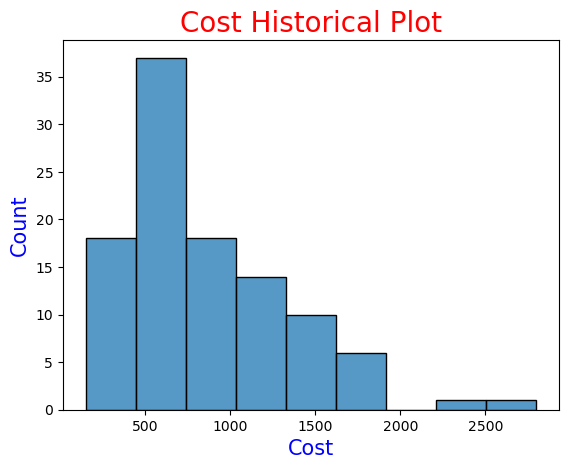

In [13]:
sns.histplot(df1["Cost"])
plt.title("Cost Historical Plot",color='r',fontsize=20)
plt.xlabel("Cost",color='b',fontsize=15)
plt.ylabel("Count",color='b',fontsize=15)
plt.show()

In [14]:
df1["Timings"].value_counts()

11 AM to 11 PM                                                                                                                                                              6
12 Noon to 11 PM                                                                                                                                                            5
12 Noon to 12 Midnight                                                                                                                                                      5
11:30 AM to 1 AM                                                                                                                                                            3
12 Noon to 10:30 PM                                                                                                                                                         3
                                                                                                                                  

In [15]:
df2=pd.read_csv("Zomato Restaurant reviews.csv")
df2

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [16]:
df3=df2.copy(deep=True)
df3.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [18]:
df3.drop("Reviewer",axis=1,inplace=True)

In [19]:
df3["Time"]=pd.to_datetime(df3["Time"])
df3.head()

,Restaurant,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [20]:
df3["Rating"].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [21]:
#Like is replacing with 1 Star rating of the data
df3["Rating"]=df3["Rating"].replace("Like",1)
df3["Rating"].value_counts()

5      3832
4      2373
1      1735
3      1193
2       684
4.5      69
3.5      47
2.5      19
1.5       9
1         1
Name: Rating, dtype: int64

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  10000 non-null  object        
 1   Review      9955 non-null   object        
 2   Rating      9962 non-null   object        
 3   Metadata    9962 non-null   object        
 4   Time        9962 non-null   datetime64[ns]
 5   Pictures    10000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 468.9+ KB


In [23]:
df3[df3["Review"].isna()]

,Restaurant,Review,Rating,Metadata,Time,Pictures
2360,Amul,NaN,5,0 Reviews,2018-07-29 18:00:00,0
5799,Being Hungry,NaN,5,"4 Reviews , 4 Followers",2018-07-19 23:55:00,0
6449,Hyderabad Chefs,NaN,5,1 Review,2018-07-23 16:29:00,0
6489,Hyderabad Chefs,NaN,5,1 Review,2018-07-08 21:19:00,0
7954,Olive Garden,NaN,3,"1 Review , 1 Follower",2018-08-09 23:25:00,0
8228,Al Saba Restaurant,NaN,5,1 Review,2018-07-20 22:42:00,0
8777,American Wild Wings,NaN,NaN,NaN,NaT,0
8778,American Wild Wings,NaN,NaN,NaN,NaT,0
8779,American Wild Wings,NaN,NaN,NaN,NaT,0
8780,American Wild Wings,NaN,NaN,NaN,NaT,0


**Review Column is an text data, So we cannot replace the data. So dropping that rows.**

In [24]:
df3.dropna(inplace=True)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Review      9955 non-null   object        
 2   Rating      9955 non-null   object        
 3   Metadata    9955 non-null   object        
 4   Time        9955 non-null   datetime64[ns]
 5   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 544.4+ KB


In [26]:
df3.head(3)

,Restaurant,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0


In [27]:
df3["Rating"].value_counts()

5      3826
4      2373
1      1735
3      1192
2       684
4.5      69
3.5      47
2.5      19
1.5       9
1         1
Name: Rating, dtype: int64

**Observe Rating column is object datatype. So, converting from object data type into float datatype.**

In [28]:
df3["Rating"]=pd.to_numeric(df3["Rating"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Review      9955 non-null   object        
 2   Rating      9955 non-null   float64       
 3   Metadata    9955 non-null   object        
 4   Time        9955 non-null   datetime64[ns]
 5   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 544.4+ KB


In [29]:
df3[['Reviews','Followers']]=df3['Metadata'].str.split(' , ',expand=True)
df3.head(3)

,Restaurant,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1 Review,2 Followers
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3 Reviews,2 Followers
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2 Reviews,3 Followers


In [30]:
df3[["Reviews Count","Rew"]]=df3["Reviews"].str.split(' ',expand=True)
df3[["Followers Count","Fol"]]=df3["Followers"].str.split(' ',expand=True)
df3.head(3)

,Restaurant,Review,Rating,Metadata,Time,Pictures,Reviews,Followers,Reviews Count,Rew,Followers Count,Fol
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1 Review,2 Followers,1,Review,2,Followers
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3 Reviews,2 Followers,3,Reviews,2,Followers
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2 Reviews,3 Followers,2,Reviews,3,Followers


In [31]:
df3.drop(["Metadata","Rew","Fol","Reviews","Followers"],axis=1,inplace=True)
df3["Reviews Count"]=pd.to_numeric(df3["Reviews Count"])
df3["Followers Count"]=pd.to_numeric(df3["Followers Count"])
df3.head(3)

,Restaurant,Review,Rating,Time,Pictures,Reviews Count,Followers Count
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant       9955 non-null   object        
 1   Review           9955 non-null   object        
 2   Rating           9955 non-null   float64       
 3   Time             9955 non-null   datetime64[ns]
 4   Pictures         9955 non-null   int64         
 5   Reviews Count    9955 non-null   int64         
 6   Followers Count  8381 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 622.2+ KB


**Less amount of data is missing on Followers Count Data,So replacing the missing data with median (Statistical analysis)**

In [33]:
df3["Followers Count"]=df3["Followers Count"].fillna(df3["Followers Count"].median(),axis=0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant       9955 non-null   object        
 1   Review           9955 non-null   object        
 2   Rating           9955 non-null   float64       
 3   Time             9955 non-null   datetime64[ns]
 4   Pictures         9955 non-null   int64         
 5   Reviews Count    9955 non-null   int64         
 6   Followers Count  9955 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 622.2+ KB


In [34]:
df1.head(3)

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


In [35]:
df1["Cuisines"].value_counts()

North Indian, Chinese                                   4
North Indian                                            3
Ice Cream, Desserts                                     2
Biryani, North Indian, Chinese                          2
South Indian, North Indian, Chinese                     2
                                                       ..
Biryani, South Indian, North Indian, Chinese, Andhra    1
Italian, North Indian, South Indian, Asian              1
North Indian, Fast Food                                 1
Arabian, North Indian, Chinese                          1
Thai, Asian, Chinese, Malaysian                         1
Name: Cuisines, Length: 92, dtype: int64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [37]:
df1.rename({"Name":"Restaurant"},axis=1,inplace=True)
df1.head(3)

,Restaurant,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


**To join the two datasets into single table with same column name with common rows used as inner join.**

In [38]:
df4=pd.merge(df1,df3,on="Restaurant",how='inner')
df4

,Restaurant,Links,Cost,Cuisines,Timings,Review,Rating,Time,Pictures,Reviews Count,Followers Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Madhumathi Mahajan Well to start with nice cou...,3.0,2016-06-05 00:08:00,0,53,54.0
9951,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",This place has never disappointed us.. The foo...,4.5,2016-06-04 22:01:00,0,2,53.0
9952,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM","Bad rating is mainly because of ""Chicken Bone ...",1.5,2016-06-03 10:37:00,3,65,423.0
9953,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",I personally love and prefer Chinese Food. Had...,4.0,2016-05-31 17:22:00,0,13,144.0


In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant       9955 non-null   object        
 1   Links            9955 non-null   object        
 2   Cost             9955 non-null   int64         
 3   Cuisines         9955 non-null   object        
 4   Timings          9955 non-null   object        
 5   Review           9955 non-null   object        
 6   Rating           9955 non-null   float64       
 7   Time             9955 non-null   datetime64[ns]
 8   Pictures         9955 non-null   int64         
 9   Reviews Count    9955 non-null   int64         
 10  Followers Count  9955 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 933.3+ KB


In [40]:
df4.describe()

,Cost,Rating,Pictures,Reviews Count,Followers Count
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,871.778001,3.600000,0.751984,24.006730,165.163536
std,503.493275,1.483727,2.575691,50.629274,619.630544
min,150.000000,1.000000,0.000000,0.000000,1.000000
25%,500.000000,3.000000,0.000000,1.000000,3.000000
50%,700.000000,4.000000,0.000000,4.000000,13.000000
75%,1200.000000,5.000000,0.000000,22.000000,63.000000
max,2800.000000,5.000000,64.000000,1031.000000,13410.000000


In [41]:
df4.head(2)

,Restaurant,Links,Cost,Cuisines,Timings,Review,Rating,Time,Pictures,Reviews Count,Followers Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0


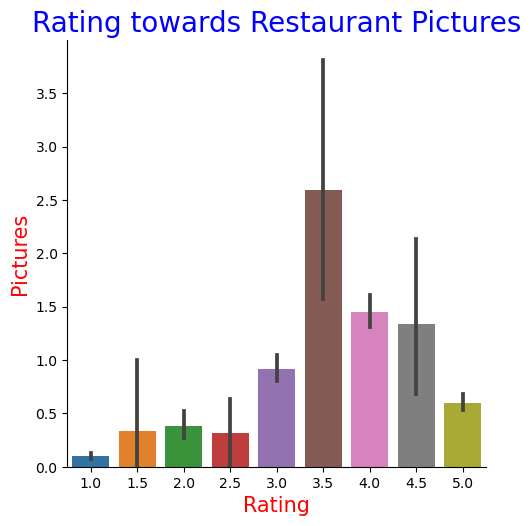

In [42]:
sns.catplot(x="Rating",y="Pictures",data=df4,kind='bar')
plt.title("Rating towards Restaurant Pictures",color='b',fontsize=20)
plt.xlabel("Rating",color='r',fontsize=15)
plt.ylabel("Pictures",color='r',fontsize=15)
plt.show()

**Restaurant rating on 3.5 are having high pictures and with 1 point rating of restaurants are very low pictures**

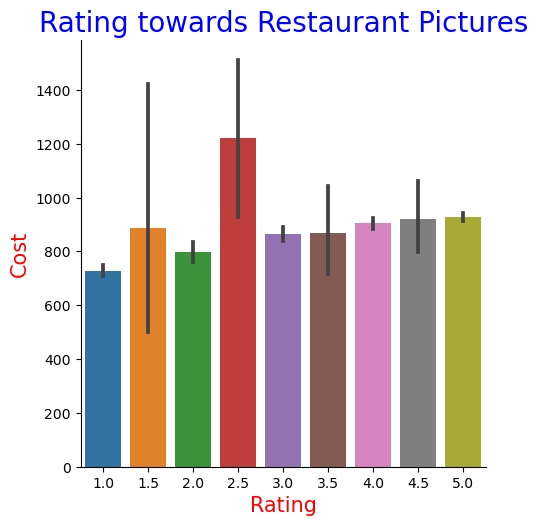

In [43]:
sns.catplot(x="Rating",y="Cost",data=df4,kind='bar')
plt.title("Rating towards Restaurant Pictures",color='b',fontsize=20)
plt.xlabel("Rating",color='r',fontsize=15)
plt.ylabel("Cost",color='r',fontsize=15)
plt.show()

**Restaurant rating with 2.5 are having maximum cost on 1200/- whereas with 1 point rating restaurants with 700/- rupees cost people were interested.**

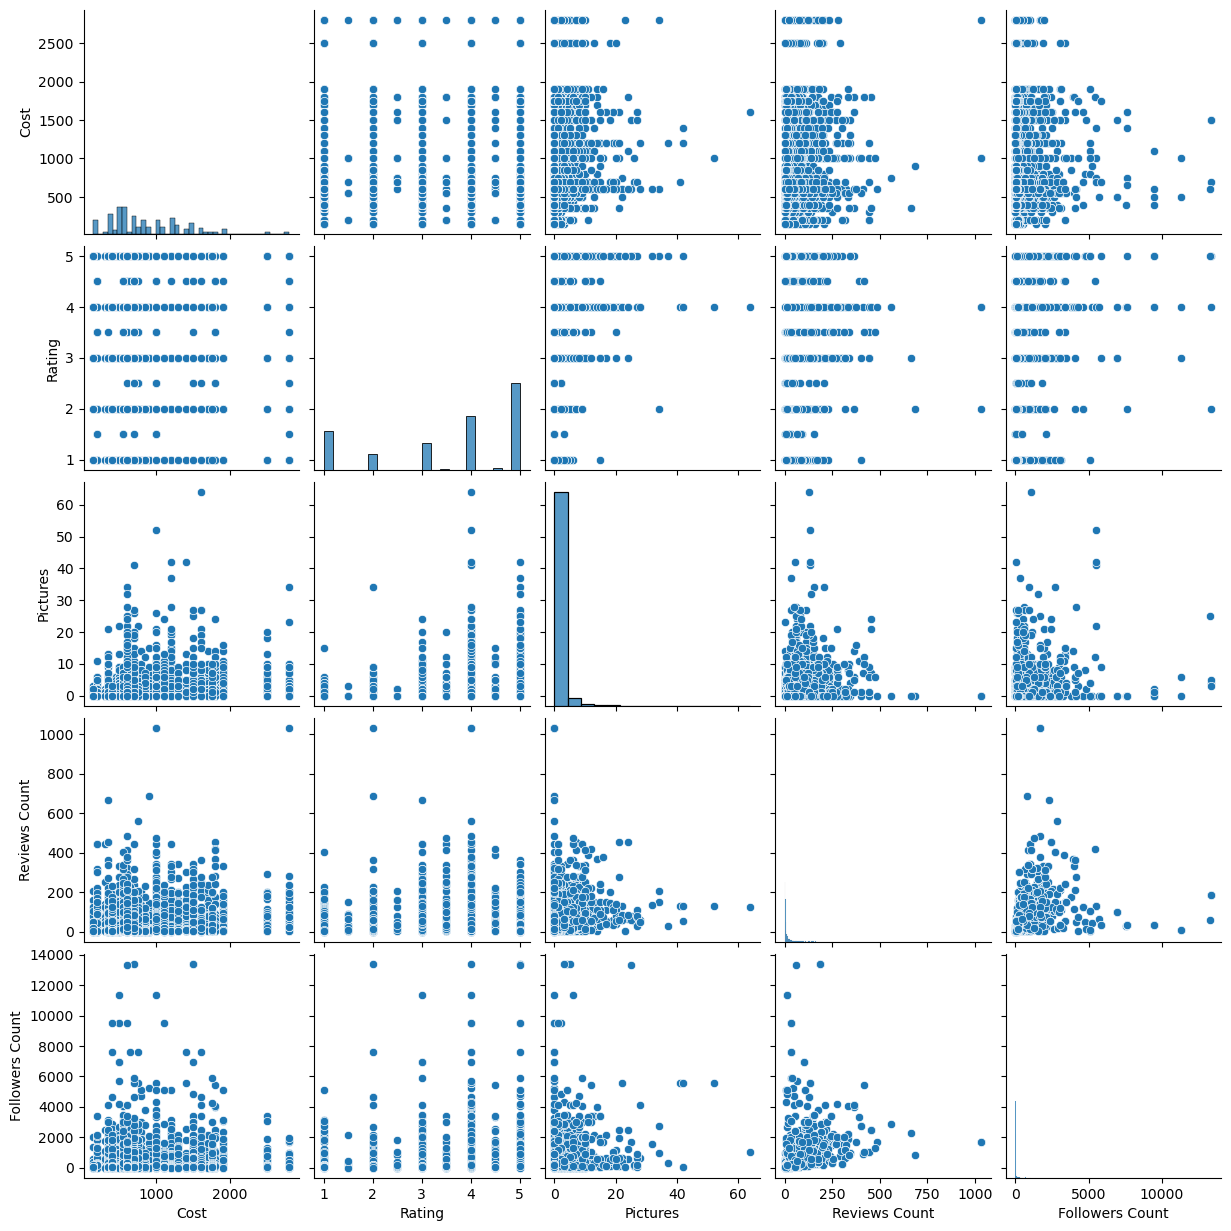

In [44]:
sns.pairplot(df4)
plt.show()

# Business Problem-1:
- **Analysing the Zomato restaurant data for each city in India:**

In [45]:
df4["Restaurant"].value_counts()

Beyond Flavours               100
PourHouse7                    100
Urban Asia - Kitchen & Bar    100
The Indi Grill                100
The Tilt Bar Republic         100
                             ... 
Being Hungry                   99
Olive Garden                   99
Hyderabad Chefs                98
Arena Eleven                   85
American Wild Wings            77
Name: Restaurant, Length: 100, dtype: int64

In [46]:
df4["Restaurant"].value_counts().head(50)

Beyond Flavours                                      100
PourHouse7                                           100
Urban Asia - Kitchen & Bar                           100
The Indi Grill                                       100
The Tilt Bar Republic                                100
Yum Yum Tree - The Arabian Food Court                100
Aromas@11SIX                                         100
Komatose - Holiday Inn Express & Suites              100
Dine O China                                         100
Shree Santosh Dhaba Family Restaurant                100
Prism Club & Kitchen                                 100
KS Bakers                                            100
Shanghai Chef 2                                      100
Tempteys                                             100
Feast - Sheraton Hyderabad Hotel                     100
Cafe Eclat                                           100
Asian Meal Box                                       100
Diners Pavilion                

In [47]:
df4["Restaurant"].value_counts().tail(50)

13 Dhaba                                 100
Pakwaan Grand                            100
10 Downing Street                        100
Hotel Zara Hi-Fi                         100
NorFest - The Dhaba                      100
KFC                                      100
AB's - Absolute Barbecues                100
The Lal Street - Bar Exchange            100
Barbeque Nation                          100
SKYHY                                    100
Sardarji's Chaats & More                 100
Cream Stone                              100
Hyper Local                              100
Shah Ghouse Spl Shawarma                 100
eat.fit                                  100
The Fisherman's Wharf                    100
Over The Moon Brew Company               100
Shah Ghouse Hotel & Restaurant           100
Flechazo                                 100
Owm Nom Nom                              100
B-Dubs                                   100
Tiki Shack                               100
Club Rogue

In [48]:
df4["Links"].value_counts().head(50)

https://www.zomato.com/hyderabad/beyond-flavours-gachibowli                                 100
https://www.zomato.com/hyderabad/pourhouse7-gachibowli                                      100
https://www.zomato.com/hyderabad/urban-asia-kitchen-bar-gachibowli                          100
https://www.zomato.com/hyderabad/the-indi-grill-gachibowli                                  100
https://www.zomato.com/thetiltbarrepublic                                                   100
https://www.zomato.com/hyderabad/yum-yum-tree-the-arabian-food-court-gachibowli             100
https://www.zomato.com/hyderabad/aromas11six-gachibowli                                     100
https://www.zomato.com/hyderabad/komatose-holiday-inn-express-suites-gachibowli             100
https://www.zomato.com/hyderabad/dine-o-china-gachibowli                                    100
https://www.zomato.com/hyderabad/shree-santosh-dhaba-family-restaurant-gachibowli           100
https://www.zomato.com/hyderabad/prism-c

In [49]:
df4["Links"].value_counts().tail(50)

https://www.zomato.com/hyderabad/13-dhaba-gachibowli                               100
https://www.zomato.com/hyderabad/pakwaan-grand-gachibowli                          100
https://www.zomato.com/hyderabad/10-downing-street-gachibowli                      100
https://www.zomato.com/hyderabad/hotel-zara-gachibowli                             100
https://www.zomato.com/hyderabad/norfest-the-dhaba-gachibowli                      100
https://www.zomato.com/hyderabad/kfc-gachibowli                                    100
https://www.zomato.com/hyderabad/abs-absolute-barbecues-gachibowli                 100
https://www.zomato.com/hyderabad/the-lal-street-bar-exchange-gachibowli            100
https://www.zomato.com/hyderabad/barbeque-nation-gachibowli                        100
https://www.zomato.com/hyderabad/skyhy-gachibowli                                  100
https://www.zomato.com/hyderabad/sardarjis-chaats-more-gachibowli                  100
https://www.zomato.com/hyderabad/cream-ston

**All the restaurants from Hyderabad City at near sides of Gachibowli area only.**

In [50]:
rest_cost_fol_rev_rat_avg=pd.DataFrame(df4.groupby(["Restaurant"])[["Cost","Reviews Count","Rating",
                                                                "Followers Count"]].mean())
rest_cost_fol_rev_rat_avg

,Cost,Reviews Count,Rating,Followers Count
Restaurant,,,,
10 Downing Street,1900.0,39.90,3.80,246.51
13 Dhaba,450.0,17.70,3.48,88.96
"3B's - Buddies, Bar & Barbecue",1100.0,3.70,4.76,17.15
AB's - Absolute Barbecues,1500.0,2.71,4.88,10.60
Absolute Sizzlers,750.0,11.67,3.62,168.03
...,...,...,...,...
Urban Asia - Kitchen & Bar,1100.0,39.34,3.65,193.34
Yum Yum Tree - The Arabian Food Court,1200.0,19.84,3.56,112.83
Zega - Sheraton Hyderabad Hotel,1750.0,27.38,4.45,290.85


In [51]:
rest_cost_fol_rev_rat_avg.head(50)

,Cost,Reviews Count,Rating,Followers Count
Restaurant,,,,
10 Downing Street,1900.0,39.900000,3.800000,246.510000
13 Dhaba,450.0,17.700000,3.480000,88.960000
"3B's - Buddies, Bar & Barbecue",1100.0,3.700000,4.760000,17.150000
AB's - Absolute Barbecues,1500.0,2.710000,4.880000,10.600000
Absolute Sizzlers,750.0,11.670000,3.620000,168.030000
Al Saba Restaurant,750.0,17.353535,3.136364,102.080808
American Wild Wings,600.0,24.000000,3.974026,330.376623
Amul,150.0,15.414141,3.929293,74.333333
Arena Eleven,1600.0,34.411765,4.117647,231.705882


In [52]:
rest_cost_fol_rev_rat_avg.tail(50)

,Cost,Reviews Count,Rating,Followers Count
Restaurant,,,,
Karachi Cafe,600.0,42.260000,3.715000,218.430000
Khaan Saab,1100.0,12.230000,3.800000,189.860000
Komatose - Holiday Inn Express & Suites,1500.0,30.580000,3.690000,463.070000
Kritunga Restaurant,500.0,6.980000,3.470000,27.430000
La La Land - Bar & Kitchen,1000.0,32.210000,3.190000,143.390000
Labonel,1000.0,66.280000,3.915000,292.550000
Marsala Food Company,700.0,32.470000,3.460000,160.270000
Mathura Vilas,500.0,17.000000,2.820000,81.700000
Mazzo - Marriott Executive Apartments,1700.0,27.780000,4.190000,176.920000


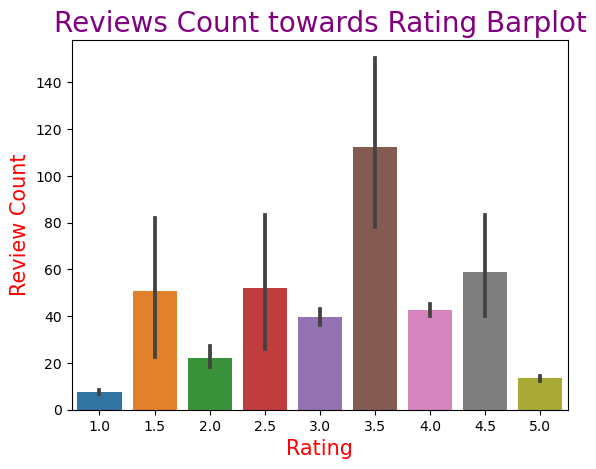

In [53]:
sns.barplot(y="Reviews Count",x="Rating",data=df4)
plt.title("Reviews Count towards Rating Barplot",color='purple',fontsize=20)
plt.xlabel("Rating",color='r',fontsize=15)
plt.ylabel("Review Count",color='r',fontsize=15)
plt.show()

- **From the above plot,Highest Review Count is 3.5 rating and the least Review Count is 1 rating.**

In [54]:
df4.head(3)

,Restaurant,Links,Cost,Cuisines,Timings,Review,Rating,Time,Pictures,Reviews Count,Followers Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0


In [55]:
df4["year"]=df4["Time"].dt.year
df4.head()

,Restaurant,Links,Cost,Cuisines,Timings,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019


In [56]:
res_pic=pd.crosstab(df4["Restaurant"],df4["Pictures"])
res_pic

Pictures,0,1,2,3,4,5,6,7,8,9,...,26,27,28,32,34,37,41,42,52,64
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,76,5,3,3,2,2,4,2,1,0,...,0,0,0,0,0,0,0,0,0,0
13 Dhaba,81,10,3,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"3B's - Buddies, Bar & Barbecue",93,2,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AB's - Absolute Barbecues,93,3,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Absolute Sizzlers,89,4,3,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Urban Asia - Kitchen & Bar,66,8,1,8,3,1,1,5,1,1,...,0,0,0,0,0,0,0,0,0,0
Yum Yum Tree - The Arabian Food Court,64,14,9,2,1,1,1,1,4,0,...,0,0,0,0,0,0,0,0,0,0
Zega - Sheraton Hyderabad Hotel,77,6,5,3,3,0,1,3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df4["Hour"]=df4["Time"].dt.hour
df4.head(3)

,Restaurant,Links,Cost,Cuisines,Timings,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,22


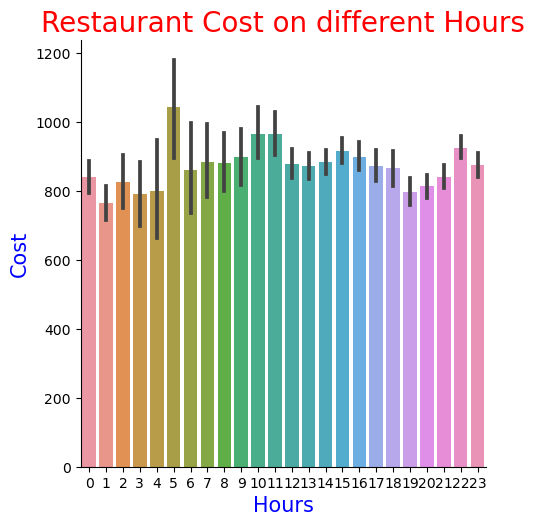

In [58]:
sns.catplot(x="Hour",y="Cost",data=df4,kind='bar')
plt.title("Restaurant Cost on different Hours",color='r',fontsize=20)
plt.xlabel("Hours",color='b',fontsize=15)
plt.ylabel("Cost",color='b',fontsize=15)
plt.show()

**High Cost on 5AM on more than 1000 rupees customers were paying. The Restaurants were mostly average cost on 700 rupees on daily working time.**

In [59]:
# dropping Timings Column
df4.drop("Timings",axis=1,inplace=True)
df4.head(3)

,Restaurant,Links,Cost,Cuisines,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,22


In [60]:
df4["Cuisines"].value_counts()

North Indian, Chinese                                  397
North Indian                                           300
South Indian, North Indian, Chinese                    200
North Indian, Chinese, Biryani                         200
North Indian, Chinese, Continental                     200
                                                      ... 
Chinese, Seafood                                       100
Fast Food, Pizza                                        99
North Indian, Chinese, Seafood, Biryani, Hyderabadi     99
North Indian, Chinese, Continental, Biryani             99
American, Fast Food, Salad, Burger                      77
Name: Cuisines, Length: 89, dtype: int64

In [61]:
cuisines=df4["Cuisines"].unique()
cuisines

array(['Chinese, Continental, Kebab, European, South Indian, North Indian',
       'Biryani, North Indian, Chinese',
       'Asian, Mediterranean, North Indian, Desserts',
       'Biryani, North Indian, Chinese, Seafood, Beverages',
       'Asian, Continental, North Indian, Chinese, Mediterranean',
       'Seafood, Goan, North Indian, Continental, Asian',
       'Healthy Food, North Indian, Continental, South Indian',
       'Lebanese', 'American, Chinese, North Indian, Kebab, South Indian',
       'Ice Cream, Desserts', 'Street Food, North Indian, Fast Food',
       'Mediterranean, North Indian, Kebab, BBQ',
       'Continental, American, Chinese',
       'North Indian, Italian, Finger Food',
       'European, Mediterranean, North Indian', 'Burger, Fast Food',
       'North Indian', 'Chinese, North Indian',
       'North Indian, Chinese, Continental',
       'North Indian, Chinese, Biryani',
       'North Indian, Japanese, Italian, Salad, Sushi', 'American',
       'Continental', 'Mex

# Applying Association Rules only on Cuisines Data:

In [62]:
cuisines_split=[item.split(', ') for item in cuisines]
cuisines_split

[['Chinese',
  'Continental',
  'Kebab',
  'European',
  'South Indian',
  'North Indian'],
 ['Biryani', 'North Indian', 'Chinese'],
 ['Asian', 'Mediterranean', 'North Indian', 'Desserts'],
 ['Biryani', 'North Indian', 'Chinese', 'Seafood', 'Beverages'],
 ['Asian', 'Continental', 'North Indian', 'Chinese', 'Mediterranean'],
 ['Seafood', 'Goan', 'North Indian', 'Continental', 'Asian'],
 ['Healthy Food', 'North Indian', 'Continental', 'South Indian'],
 ['Lebanese'],
 ['American', 'Chinese', 'North Indian', 'Kebab', 'South Indian'],
 ['Ice Cream', 'Desserts'],
 ['Street Food', 'North Indian', 'Fast Food'],
 ['Mediterranean', 'North Indian', 'Kebab', 'BBQ'],
 ['Continental', 'American', 'Chinese'],
 ['North Indian', 'Italian', 'Finger Food'],
 ['European', 'Mediterranean', 'North Indian'],
 ['Burger', 'Fast Food'],
 ['North Indian'],
 ['Chinese', 'North Indian'],
 ['North Indian', 'Chinese', 'Continental'],
 ['North Indian', 'Chinese', 'Biryani'],
 ['North Indian', 'Japanese', 'Italian', '

In [63]:
all_cuisines=np.unique(np.concatenate(cuisines_split))
all_cuisines

array(['American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery',
       'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental',
       'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan',
       'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian',
       'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean',
       'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian',
       'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'], dtype='<U13')

In [64]:
cuisine_data=pd.DataFrame(False,index=np.arange(len(cuisines)),columns=all_cuisines)
cuisine_data

,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
cuisine_data

,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
for item,food in enumerate(cuisines_split):
    cuisine_data.loc[item,food]=True
cuisine_data

,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Apriori Algorithm:

In [67]:
from mlxtend.frequent_patterns import apriori
cuisine_items_freq=apriori(cuisine_data,min_support=0.14,use_colnames=True)
cuisine_items_freq

,support,itemsets
0,0.157303,(Asian)
1,0.146067,(Biryani)
2,0.382022,(Chinese)
3,0.213483,(Continental)
4,0.146067,(Fast Food)
5,0.157303,(Italian)
6,0.573034,(North Indian)
7,0.303371,"(North Indian, Chinese)"
8,0.146067,"(North Indian, Continental)"


# Measures of Association Rules:

**1. Support:** 
- **Support means Ratio of How many items on both X&y to Total No.of Items.**

**2. Confidence:**
- **Confidence means Ratio of How many items on both X&y to Total Count of only X.**

**3. Lift:**
- **Lift means ratio of Support to the product of Support of each Item.**


In [68]:
from mlxtend.frequent_patterns import association_rules
asr_cuis=association_rules(cuisine_items_freq,metric='lift',min_threshold=0.9)
asr_cuis

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(North Indian),(Chinese),0.573034,0.382022,0.303371,0.529412,1.385813,1.0,0.084459,1.313202,0.652047,0.465517,0.238503,0.661765
1,(Chinese),(North Indian),0.382022,0.573034,0.303371,0.794118,1.385813,1.0,0.084459,2.073836,0.450505,0.465517,0.517802,0.661765
2,(North Indian),(Continental),0.573034,0.213483,0.146067,0.254902,1.194014,1.0,0.023734,1.055588,0.380567,0.228070,0.052661,0.469556
3,(Continental),(North Indian),0.213483,0.573034,0.146067,0.684211,1.194014,1.0,0.023734,1.352060,0.206593,0.228070,0.260388,0.469556


**The below are Top 5 Cuisines were interested Customers to eat in Restaurants on given data:**
- **57.3% of North Indian.**
- **38.2% of Chinese.**
- **21% of Continental.**
- **15% of both Italian and Asian.**
- **14% of both Biryani and Fast Foods.**

**The above data represents Overall Combo tasty items were sold mostly liked by customers:** 
- **1. North Indian and Chinese** 
- **2. North Indian and Continental**

In [69]:
df4.head(2)

,Restaurant,Links,Cost,Cuisines,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14


# Natural Language Processing (NLP):

In [70]:
review=pd.DataFrame(df4.loc[:,["Review"]])
review

,Review
0,"The ambience was good, food was quite good . h..."
1,Ambience is too good for a pleasant evening. S...
2,A must try.. great food great ambience. Thnx f...
3,Soumen das and Arun was a great guy. Only beca...
4,Food is good.we ordered Kodi drumsticks and ba...
...,...
9950,Madhumathi Mahajan Well to start with nice cou...
9951,This place has never disappointed us.. The foo...
9952,"Bad rating is mainly because of ""Chicken Bone ..."
9953,I personally love and prefer Chinese Food. Had...


# Text Preprocessing:

In [71]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
corpus_review=[]
for word in range(len(review)):
    rev=re.sub('[^a-zA-Z]'," ",review["Review"][word])
    rev=rev.lower()
    rev=rev.split()
    rev=[wnl.lemmatize(text) for text in rev if not text in set(stopwords.words('english'))]
    rev=" ".join(rev)
    corpus_review.append(rev)
print(corpus_review)

['ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful', 'ambience good pleasant evening service prompt food good good experience soumen da kudos service', 'must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing', 'soumen da arun great guy behavior sincerety good food course would like visit place', 'food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good', 'ambiance good service good food apradeecp subro best service food good papiya good hostess ur caption good star restaurant', 'nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place', 'well reading many review finally visited place ambience good coming food crispy corn nice tawa fish ok basket biryani disappointed u biryani ok flatte

# Text Vectorization:

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv_text=CountVectorizer()
X=cv_text.fit_transform(corpus_review)

# Model-1: K-Means++ Clustering:

In [73]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,6):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[361286.24108487996, 349104.6950688175, 348631.73563041695, 341122.0296198401, 337610.62119199114]


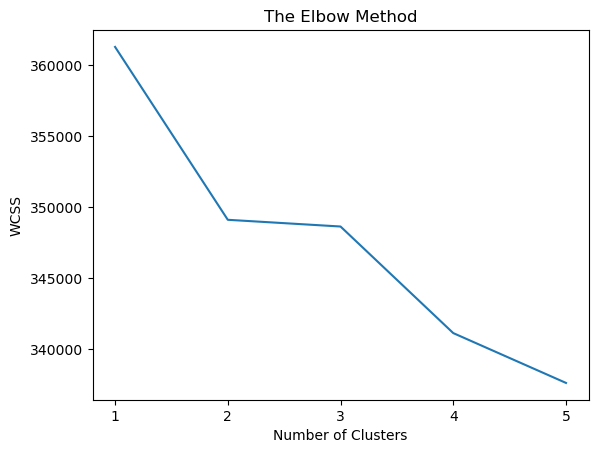

In [74]:
plt.plot(range(1,6),wcss)
plt.xticks(range(1,6))
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [75]:
kmeans=KMeans(n_clusters=4,init="k-means++")
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 2, 1, 3])

In [76]:
df4["y_k-means"]=pd.DataFrame(y_kmeans)
df4.head(2)

,Restaurant,Links,Cost,Cuisines,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour,y_k-means
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15,1
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14,1


In [77]:
df4["y_k-means"].value_counts()

3    5775
1    3359
2     752
0      69
Name: y_k-means, dtype: int64

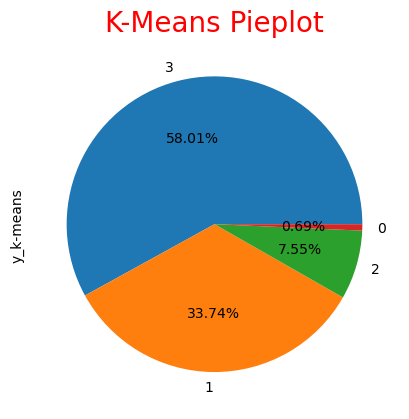

In [78]:
df4["y_k-means"].value_counts().plot(kind='pie',autopct="%0.2f%%")
plt.title("K-Means Pieplot",color='r',fontsize=20)
plt.show()

# Model-2: Hierarchical Clustering:

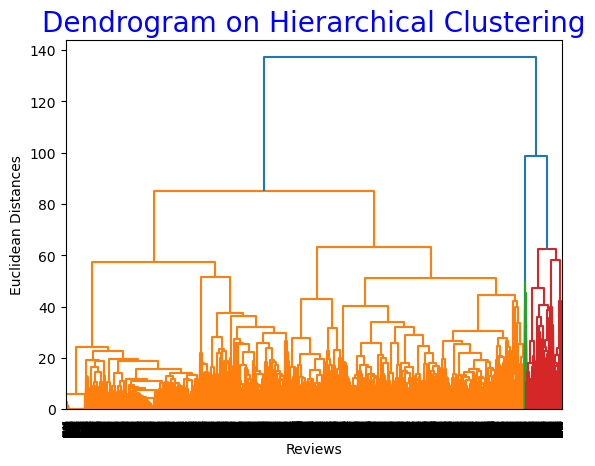

In [79]:
import scipy.cluster.hierarchy as sch
hc_res=sch.linkage(X.toarray(),method='ward')
dendrogram=sch.dendrogram(hc_res)
plt.title("Dendrogram on Hierarchical Clustering",color='b',fontsize=20)
plt.xlabel("Reviews")
plt.ylabel("Euclidean Distances")
plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering as AC
hc_ac=AC(n_clusters=4,linkage='ward')
y_hc_ac=hc_ac.fit_predict(X.toarray())
y_hc_ac

array([0, 0, 0, ..., 1, 0, 3], dtype=int64)

In [81]:
df4["HC_Agg"]=pd.DataFrame(y_hc_ac)
df4["HC_Agg"].value_counts()

0    4726
3    4484
1     712
2      33
Name: HC_Agg, dtype: int64

In [82]:
df4.head(2)

,Restaurant,Links,Cost,Cuisines,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour,y_k-means,HC_Agg
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15,1,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14,1,0


# Model-3: Density Based Spatial Clustering Applications with Noise (DBSCAN):

In [83]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=1,min_samples=7)
y_dbs=dbs.fit_predict(X)
df4["DBSCAN"]=pd.DataFrame(y_dbs)
len(df4["DBSCAN"].unique())

4

In [84]:
df4["DBSCAN"].value_counts()

-1    8768
 0    1151
 1      27
 2       9
Name: DBSCAN, dtype: int64

# Model-4: Latent Dirichlet Allocation (L.D.A):

In [85]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda=LDA(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [86]:
lda_res=lda.transform(X)
lda_res

array([[0.22651866, 0.01029965, 0.01047271, 0.75270897],
       [0.24186127, 0.01687924, 0.01685728, 0.7244022 ],
       [0.01280785, 0.01319074, 0.0126861 , 0.96131532],
       ...,
       [0.22207376, 0.77438064, 0.00176035, 0.00178524],
       [0.24311015, 0.00666983, 0.00663596, 0.74358406],
       [0.00422925, 0.70310598, 0.28835638, 0.00430838]])

In [87]:
lda_res[0]

array([0.22651866, 0.01029965, 0.01047271, 0.75270897])

In [88]:
lda_res[0].argmax()

3

In [89]:
df4["y_LDA"]=lda_res.argmax(axis=1)
df4.head()

,Restaurant,Links,Cost,Cuisines,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour,y_k-means,HC_Agg,DBSCAN,y_LDA
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15,1,0,-1,3
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14,1,0,-1,3
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,22,1,0,-1,3
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,22,1,0,-1,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,21,1,0,-1,3


In [90]:
df4["y_LDA"].value_counts()

3    4823
2    2313
1    1518
0    1301
Name: y_LDA, dtype: int64

In [91]:
df4.head(2)

,Restaurant,Links,Cost,Cuisines,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour,y_k-means,HC_Agg,DBSCAN,y_LDA
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15,1,0,-1,3
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14,1,0,-1,3


# Business Problem-2,3:
- **Focuses on Customers and Company, To analyze the sentiments of the reviews given by customer in the data and make some useful conclusion in the form of Visualizations.**
- **Cluster the zomato restaurants into different segments.**

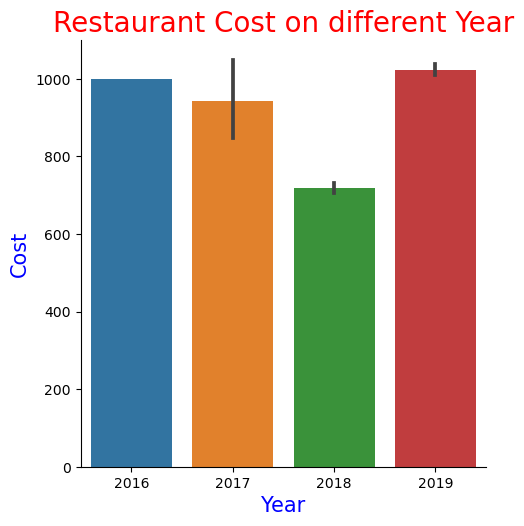

In [92]:
sns.catplot(x="year",y="Cost",data=df4,kind='bar')
plt.title("Restaurant Cost on different Year",color='r',fontsize=20)
plt.xlabel("Year",color='b',fontsize=15)
plt.ylabel("Cost",color='b',fontsize=15)
plt.show()

**In 2016, Restaurant Cost is too high upto 2018 cost reduced whereas in 2019 upto 700 rupees, restaurant cost is suddenly increased due to Covid, Customers are low So,Cost is increased.**

In [93]:
rest=df4.loc[:,["Restaurant","Review","Cost","Time","Reviews Count","Followers Count","year",
                "y_k-means","HC_Agg","DBSCAN","y_LDA"]]
rest

,Restaurant,Review,Cost,Time,Reviews Count,Followers Count,year,y_k-means,HC_Agg,DBSCAN,y_LDA
0,Beyond Flavours,"The ambience was good, food was quite good . h...",800,2019-05-25 15:54:00,1,2.0,2019,1,0,-1,3
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,800,2019-05-25 14:20:00,3,2.0,2019,1,0,-1,3
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,800,2019-05-24 22:54:00,2,3.0,2019,1,0,-1,3
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,800,2019-05-24 22:11:00,1,1.0,2019,1,0,-1,0
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,800,2019-05-24 21:37:00,3,2.0,2019,1,0,-1,3
...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,1000,2016-06-05 00:08:00,53,54.0,2016,2,1,-1,1
9951,Chinese Pavilion,This place has never disappointed us.. The foo...,1000,2016-06-04 22:01:00,2,53.0,2016,1,3,-1,3
9952,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1000,2016-06-03 10:37:00,65,423.0,2016,2,1,-1,1
9953,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,1000,2016-05-31 17:22:00,13,144.0,2016,1,0,-1,3


In [94]:
rest.head(1)

,Restaurant,Review,Cost,Time,Reviews Count,Followers Count,year,y_k-means,HC_Agg,DBSCAN,y_LDA
0,Beyond Flavours,"The ambience was good, food was quite good . h...",800,2019-05-25 15:54:00,1,2.0,2019,1,0,-1,3


In [95]:
rest_model_grp=rest.groupby(["Restaurant"])[["Cost","y_k-means","HC_Agg","DBSCAN","y_LDA"]].max()
rest_model_grp

,Cost,y_k-means,HC_Agg,DBSCAN,y_LDA
Restaurant,,,,,
10 Downing Street,1900,3,3,-1,3
13 Dhaba,450,3,3,0,3
"3B's - Buddies, Bar & Barbecue",1100,3,3,-1,3
AB's - Absolute Barbecues,1500,3,3,-1,3
Absolute Sizzlers,750,3,3,-1,3
...,...,...,...,...,...
Urban Asia - Kitchen & Bar,1100,3,3,-1,3
Yum Yum Tree - The Arabian Food Court,1200,3,3,0,3
Zega - Sheraton Hyderabad Hotel,1750,3,3,-1,3


In [96]:
rest_model_grp_fst=rest.groupby(["Restaurant"])[["Cost","y_k-means",
                                                 "HC_Agg","DBSCAN","y_LDA"]].max().head(50)
rest_model_grp_fst

,Cost,y_k-means,HC_Agg,DBSCAN,y_LDA
Restaurant,,,,,
10 Downing Street,1900,3,3,-1,3
13 Dhaba,450,3,3,0,3
"3B's - Buddies, Bar & Barbecue",1100,3,3,-1,3
AB's - Absolute Barbecues,1500,3,3,-1,3
Absolute Sizzlers,750,3,3,-1,3
Al Saba Restaurant,750,3,3,2,3
American Wild Wings,600,3,3,-1,3
Amul,150,3,3,2,3
Arena Eleven,1600,3,3,-1,3


In [97]:
rest_model_grp_nxt=rest.groupby(["Restaurant"])[["Cost","y_k-means",
                                                 "HC_Agg","DBSCAN","y_LDA"]].max().tail(50)
rest_model_grp_nxt

,Cost,y_k-means,HC_Agg,DBSCAN,y_LDA
Restaurant,,,,,
Karachi Cafe,600,3,3,0,3
Khaan Saab,1100,3,3,-1,3
Komatose - Holiday Inn Express & Suites,1500,3,3,-1,3
Kritunga Restaurant,500,3,3,2,3
La La Land - Bar & Kitchen,1000,3,3,-1,3
Labonel,1000,3,3,-1,3
Marsala Food Company,700,3,3,-1,3
Mathura Vilas,500,3,3,-1,3
Mazzo - Marriott Executive Apartments,1700,3,3,-1,3


In [98]:
class best_high_cost_restaurant:
    def __init__(self,rest_model_grp):
        self.rest_model_grp=rest_model_grp
    def top_high_cost_restaurant(self,top_n:5):
        top_restaurant_cost=self.rest_model_grp.nlargest(top_n,"Cost")
        return top_restaurant_cost
    def least_high_cost_restaurant(self,least_n:5):
        least_restaurant_cost=self.rest_model_grp.nsmallest(least_n,"Cost")
        return least_restaurant_cost

best_rest_cost=best_high_cost_restaurant(rest_model_grp)
print("Top 5 Restaurants for Customers on Highest Cost: \n")
top_5_rest_high_cost=best_rest_cost.top_high_cost_restaurant(5)
print(top_5_rest_high_cost)

print("Least 5 Restaurants of Customers on Highest Cost: \n")
least_5_rest_high_cost=best_rest_cost.least_high_cost_restaurant(5)
print(least_5_rest_high_cost)

Top 5 Restaurants for Customers on Highest Cost: 

                                                   Cost  y_k-means  HC_Agg  \
Restaurant                                                                   
Collage - Hyatt Hyderabad Gachibowli               2800          3       3   
Feast - Sheraton Hyderabad Hotel                   2500          3       3   
10 Downing Street                                  1900          3       3   
Jonathan's Kitchen - Holiday Inn Express & Suites  1900          3       3   
Cascade - Radisson Hyderabad Hitec City            1800          3       3   

                                                   DBSCAN  y_LDA  
Restaurant                                                        
Collage - Hyatt Hyderabad Gachibowli                   -1      3  
Feast - Sheraton Hyderabad Hotel                       -1      3  
10 Downing Street                                      -1      3  
Jonathan's Kitchen - Holiday Inn Express & Suites      -1      3  


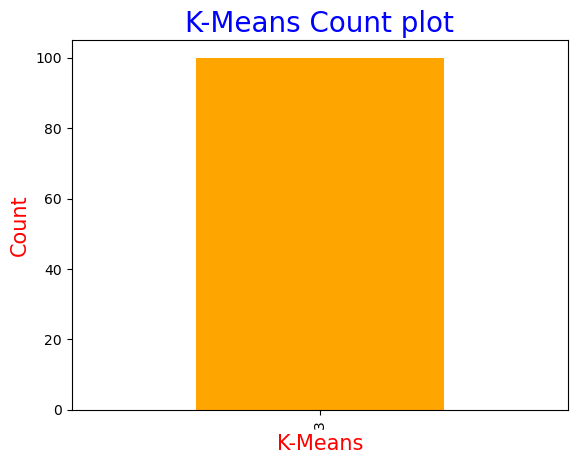

In [99]:
rest_model_grp["y_k-means"].value_counts().plot(kind='bar',color='orange')
plt.title("K-Means Count plot",color='b',fontsize=20)
plt.xlabel("K-Means",color='r',fontsize=15)
plt.ylabel("Count",color='r',fontsize=15)
plt.show()

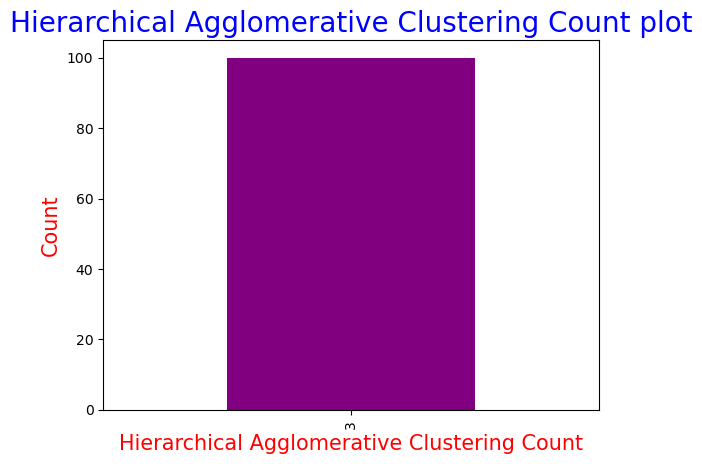

In [100]:
rest_model_grp["HC_Agg"].value_counts().plot(kind='bar',color='purple')
plt.title("Hierarchical Agglomerative Clustering Count plot",color='b',fontsize=20)
plt.xlabel("Hierarchical Agglomerative Clustering Count",color='r',fontsize=15)
plt.ylabel("Count",color='r',fontsize=15)
plt.show()

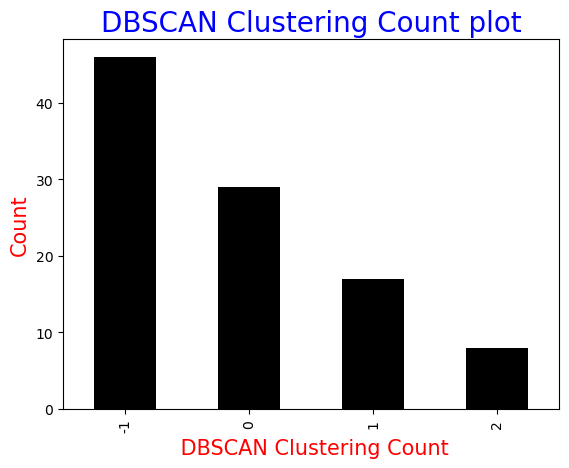

In [101]:
rest_model_grp["DBSCAN"].value_counts().plot(kind='bar',color='black')
plt.title("DBSCAN Clustering Count plot",color='b',fontsize=20)
plt.xlabel(" DBSCAN Clustering Count",color='r',fontsize=15)
plt.ylabel("Count",color='r',fontsize=15)
plt.show()

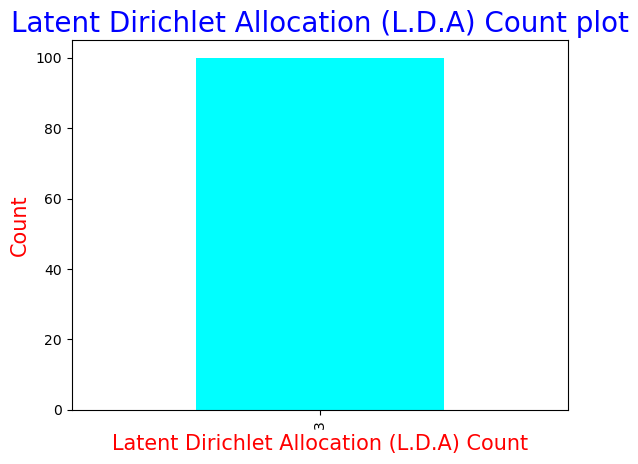

In [102]:
rest_model_grp["y_LDA"].value_counts().plot(kind='bar',color='cyan')
plt.title("Latent Dirichlet Allocation (L.D.A) Count plot",color='b',fontsize=20)
plt.xlabel("Latent Dirichlet Allocation (L.D.A) Count",color='r',fontsize=15)
plt.ylabel("Count",color='r',fontsize=15)
plt.show()

# Business Problem-4:

**Conclusion is to find best restaurants in India to find people near by their places.**

- **All the Restaurnts are from Hyderabad City and from Gachibowli area only within the best highest Cost Restaurant is Collage - Hyatt Hyderabad Gachibowli with maximum cost of 2800/- rupees and with lowest cost Restaurant is Amul Restaurant with 150/- rupees only.**

In [103]:
df4[(df4["Restaurant"]=="Collage - Hyatt Hyderabad Gachibowli")|(df4["Restaurant"]=="Amul")]

,Restaurant,Links,Cost,Cuisines,Review,Rating,Time,Pictures,Reviews Count,Followers Count,year,Hour,y_k-means,HC_Agg,DBSCAN,y_LDA
2300,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,"Ice Cream, Desserts",The place I prefer most for good taste and enj...,5.0,2019-05-19 14:01:00,0,2,1.0,2019,14,3,0,-1,1
2301,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,"Ice Cream, Desserts",We had ordered from Amul and we will order aga...,4.0,2019-05-17 12:29:00,0,207,400.0,2019,12,3,0,-1,1
2302,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,"Ice Cream, Desserts",Thank-you for serving testy milkshakes in late...,5.0,2019-05-17 01:32:00,0,1,13.0,2019,1,3,3,-1,0
2303,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,"Ice Cream, Desserts","Although I didn't go to the onsite store, but ...",4.0,2019-04-30 14:10:00,2,6,13.0,2019,14,1,0,-1,1
2304,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,"Ice Cream, Desserts",This is a small ice cream parlour.It has all g...,4.0,2019-04-19 19:02:00,2,60,2007.0,2019,19,3,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9250,Collage - Hyatt Hyderabad Gachibowli,https://www.zomato.com/hyderabad/collage-hyatt...,2800,"Continental, Italian, North Indian, Chinese, A...","For a tram dinner on a Thursday, I listed down...",2.0,2017-07-14 12:36:00,0,2,2.0,2017,12,2,0,-1,3
9251,Collage - Hyatt Hyderabad Gachibowli,https://www.zomato.com/hyderabad/collage-hyatt...,2800,"Continental, Italian, North Indian, Chinese, A...",My first stay in Hyatt and it was just awesome...,4.0,2017-07-03 13:47:00,2,21,37.0,2017,13,1,0,-1,3
9252,Collage - Hyatt Hyderabad Gachibowli,https://www.zomato.com/hyderabad/collage-hyatt...,2800,"Continental, Italian, North Indian, Chinese, A...",Collage is an absolutely picturesque restauran...,4.0,2017-06-19 15:41:00,9,75,298.0,2017,15,1,0,-1,3
9253,Collage - Hyatt Hyderabad Gachibowli,https://www.zomato.com/hyderabad/collage-hyatt...,2800,"Continental, Italian, North Indian, Chinese, A...",Went for Sunday brunch with a lots of expectat...,1.5,2017-06-16 13:21:00,0,23,13.0,2017,13,2,1,-1,3
